In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/100 Data Science/Day 5 - SMS Spam Detection/spam.csv', encoding = 'ISO-8859-1')

In [ ]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
#rename dataset columns
df.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)

#drop unnecessary columns
df.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

In [ ]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


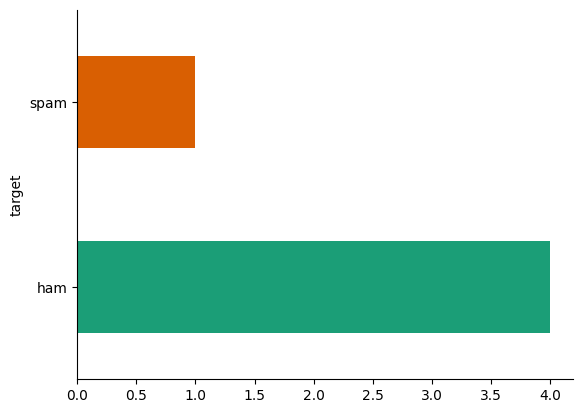

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.duplicated().sum()

403

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(5169, 2)

In [ ]:
grouped_target = df.groupby("target").count()
grouped_target["text"]

target
ham     4516
spam     653
Name: text, dtype: int64

<Axes: xlabel='target', ylabel='count'>

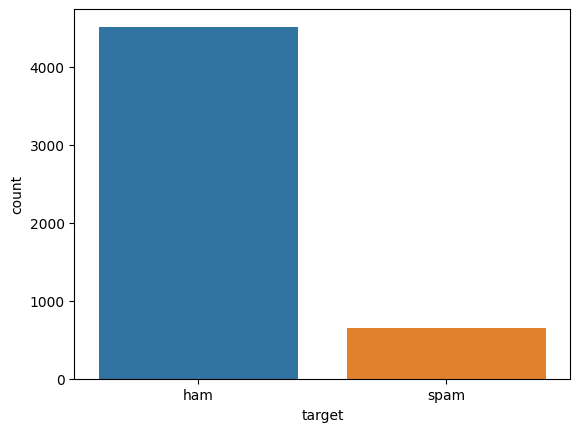

In [ ]:
import seaborn as sns
sns.countplot(data=df, x='target')

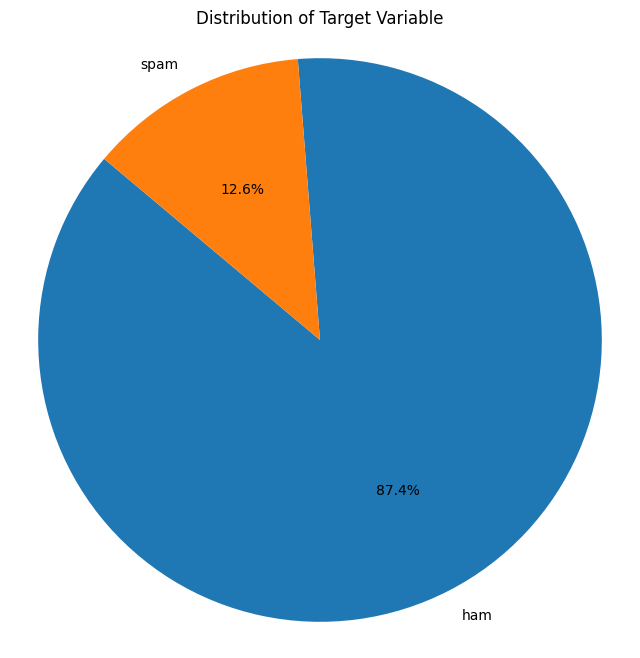

In [ ]:
import matplotlib.pyplot as plt
data = df['target'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)

# Customize the plot (optional)
plt.title("Distribution of Target Variable")
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle

# Show the plot
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['ch_no']=df['text'].apply(len)

In [ ]:
df['wd_no']=df.apply(lambda row: nltk.word_tokenize(row["text"]), axis=1).apply(len)

In [ ]:
df['sn_no']=df.apply(lambda row: nltk.sent_tokenize(row["text"]), axis=1).apply(len)

In [ ]:
df.head(5)

,target,text,ch_no,wd_no,sn_no
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df.describe()

,ch_no,wd_no,sn_no
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


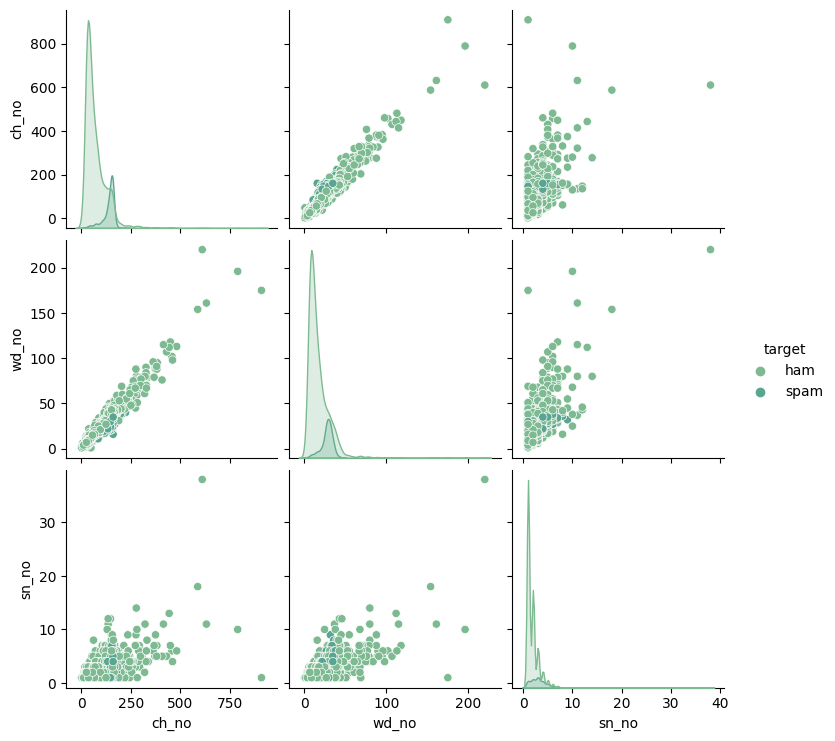

In [ ]:
# Set a colorful palette
sns.set_palette("crest")

# Create a pair plot with hue as target
sns.pairplot(df, hue='target')
plt.show()

changing the text to lower case

In [ ]:
df["text"] = df["text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

removing the punctuation marks

In [ ]:
df["text"] = df["text"].str.replace('[^\w\s]','')

<ipython-input-25-a4d5113bdc45>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('[^\w\s]','')


removing any numbers from the text

In [ ]:
df["text"] = df["text"].str.replace('\d','')

<ipython-input-26-297f1cebef03>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["text"] = df["text"].str.replace('\d','')


In [ ]:
nltk.download('stopwords')
import re, string, unicodedata

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df.head(5)

,target,text,ch_no,wd_no,sn_no
0,ham,go until jurong point crazy available only in ...,111,24,2
1,ham,ok lar joking wif u oni,29,8,2
2,spam,free entry in a wkly comp to win fa cup final...,155,37,2
3,ham,u dun say so early hor u c already then say,49,13,1
4,ham,nah i dont think he goes to usf he lives aroun...,61,15,1


deleting the stopwords and punctuations

In [ ]:
stop_words = set(stopwords.words("english"))
punctuation = list(string.punctuation)
stop_words.update(punctuation)

df["text"] = df["text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))


lemmatization to be done

In [ ]:
df["text"] = df["text"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

removing the any kind of hyperlinks which are present in spam messages

In [ ]:
df["text"] = df["text"].apply(lambda x: " ".join(re.sub(r'http\S+', '', x) for x in x.split()))

remvoing the text with less than len 3

In [ ]:
df["text"] = df["text"].apply(lambda x: ' '.join([x for x in x.split() if len(x) > 3]))

In [ ]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
alpha = []
for i in df.text:
    for j in i.split():
        alpha.append(j.strip())

In [ ]:
from collections import Counter

In [ ]:
counter = Counter(alpha)
common_words = counter.most_common(25)
dict(common_words)

{'call': 509,
 'dont': 258,
 'ltgt': 254,
 'know': 248,
 'free': 245,
 'like': 234,
 'come': 228,
 'time': 224,
 'good': 218,
 'want': 208,
 'text': 197,
 'love': 184,
 'need': 178,
 'send': 165,
 'going': 165,
 'home': 153,
 'today': 152,
 'back': 146,
 'still': 146,
 'stop': 143,
 'think': 141,
 'take': 135,
 'tell': 132,
 'reply': 130,
 'well': 129}

In [ ]:
from wordcloud import WordCloud,STOPWORDS

<function matplotlib.pyplot.show(close=None, block=None)>

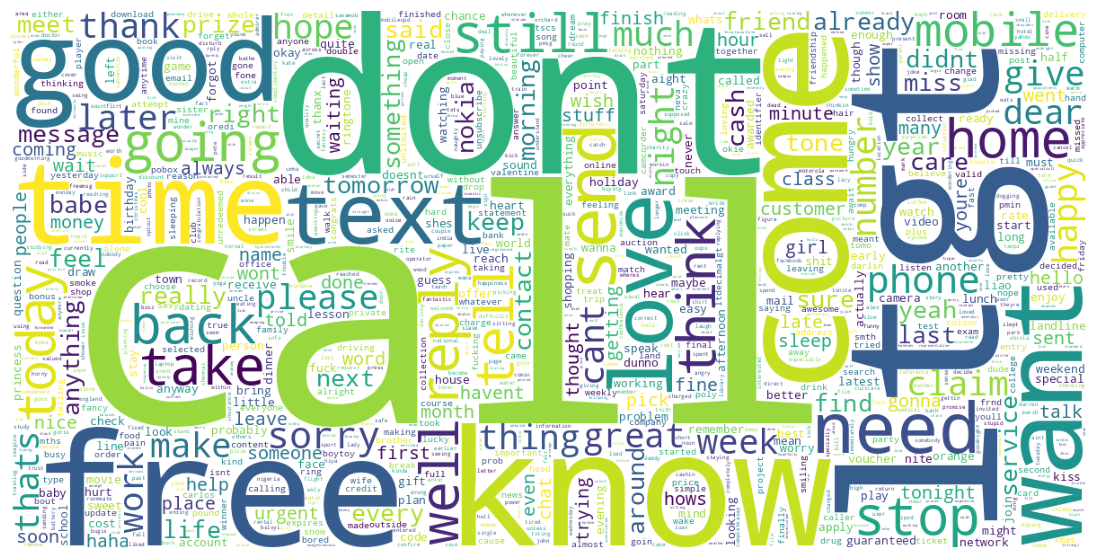

In [ ]:
text = " ".join(i for i in df.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-43-8f51566594b0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'spam'");


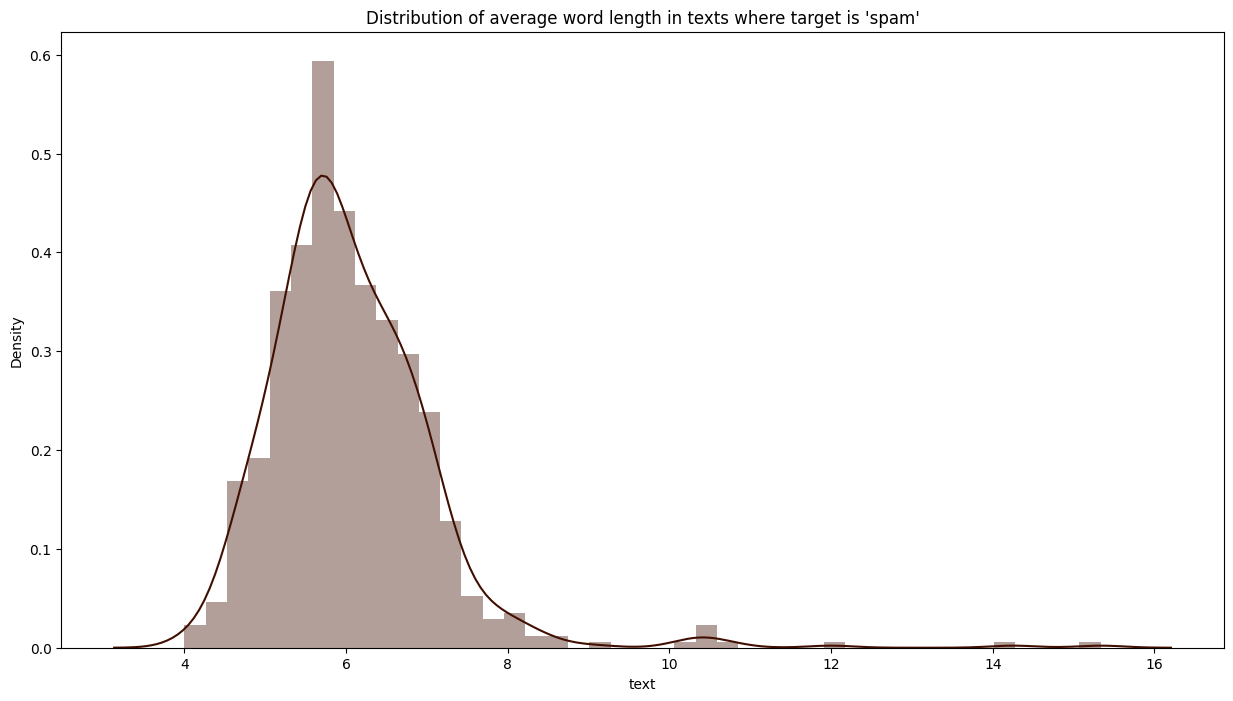

In [ ]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = df[df["target"] == "spam"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'spam'");

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-45-d4db8e40d334>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'ham'");


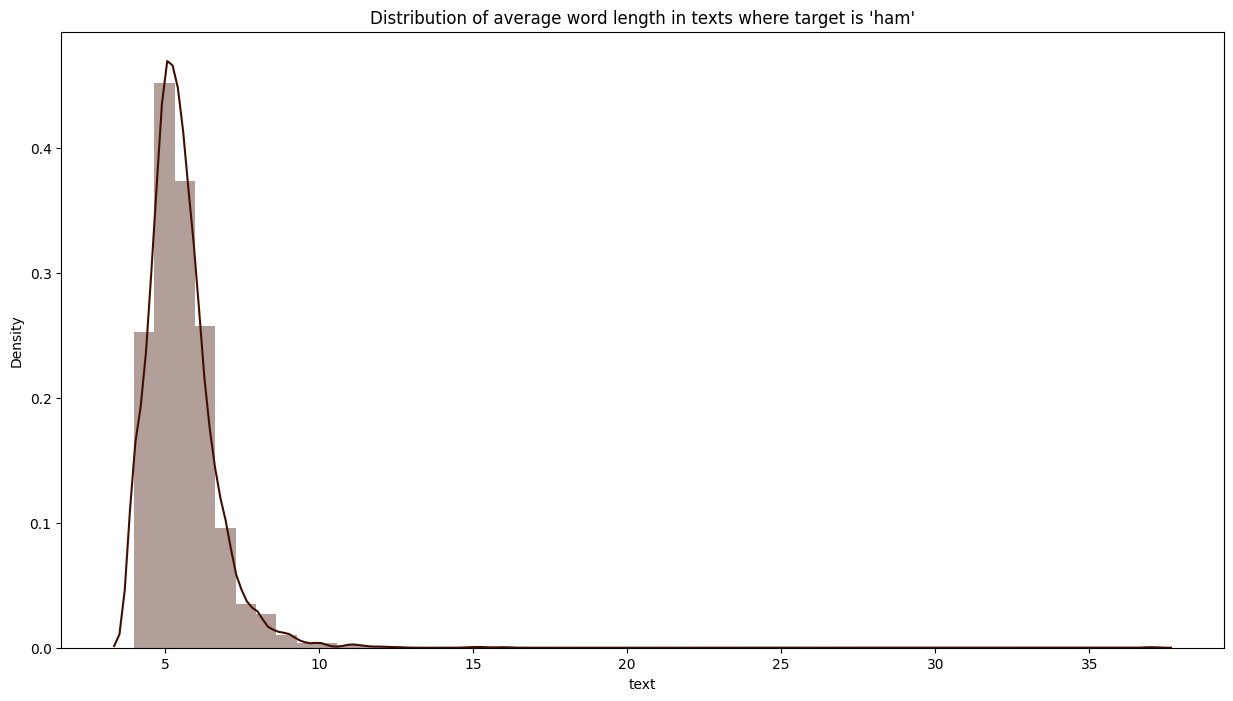

In [ ]:
fig,ax = plt.subplots(figsize = (15, 8))
text_words = df[df["target"] == "ham"]["text"].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(text_words.map(lambda x: np.mean(x)), color = "#410F01", ax = ax).set_title("Distribution of average word length in texts where target is 'ham'");

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import keras
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import preprocessing


In [ ]:
lb = LabelEncoder()
df["target"] = lb.fit_transform(df["target"])

In [ ]:
x = df["text"]
y = df["target"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.33, shuffle = True, random_state = 11)

In [ ]:
print("The shape of 'train_x' is {} and the shape of 'test_x' is {}".format(train_x.shape[0], test_x.shape[0]))

The shape of 'train_x' is 3463 and the shape of 'test_x' is 1706


In [ ]:
# calling the label encoder function
le = preprocessing.LabelEncoder()

# Encode labels in column 'sentiment'.
df['target']= le.fit_transform(df['target'])

df['target'].unique()

array([0, 1])

In [ ]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [ ]:
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df_features = df.copy()
df_features = df[['text']].reset_index(drop=True)
df_features.head()

,text
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features = 5000, ngram_range = (2,2))
# TF-IDF feature matrix
X = tfidf_vectorizer.fit_transform(df_features['text'])
X.shape

(5572, 5000)

In [ ]:
y = df['target']
y.shape

(5572,)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_resampled)}')

Original dataset shape : Counter({'ham': 4825, 'spam': 747})
Resampled dataset shape Counter({'ham': 4825, 'spam': 4825})


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    """

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from sklearn import preprocessing
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [ ]:
#creating the objects
logreg = LogisticRegression(random_state=0)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()
nb = BernoulliNB()
rf = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2:'KNN', 3:'SVC', 4:'Naive Bayes', 5: 'Random Forest'}
cv_models = [logreg, dt, knn, svc, nb, rf]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv = 2, scoring = 'accuracy').mean()))

Logistic Regression Test Accuracy: 0.8917803302225413
Decision Tree Test Accuracy: 0.9502871500358938
KNN Test Accuracy: 0.8885498923187365
SVC Test Accuracy: 0.9398779612347452
Naive Bayes Test Accuracy: 0.9370064608758076
Random Forest Test Accuracy: 0.9576453697056713
